In [29]:
import numpy
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [30]:
all_df = pd.read_csv("data.csv")

In [31]:
all_df['class']= all_df['class'].map({'RB':0, 'NRB': 1}).astype(int)

In [32]:
all_df.shape

(1055, 42)

In [33]:
X=all_df.drop(['class'], axis=1).values.astype('float64')

In [34]:
Y = all_df['class'].values.astype('int64')

In [35]:
X.shape

(1055, 41)

In [36]:
 X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

844

In [37]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [38]:
model = Sequential()

In [39]:
model.add(Dense(units=82*9,   input_dim=41,
                kernel_initializer='uniform', 
                activation='relu'))

In [40]:
model.add(Dense(units=82*8,  
                kernel_initializer='uniform', 
                activation='relu'))

In [41]:
model.add(Dense(units=82*7, 
                kernel_initializer='uniform', 
                activation='relu'))

In [42]:
model.add(Dense(units=82*6,   
                kernel_initializer='uniform', 
                activation='relu'))

In [43]:
model.add(Dense(units=82*5,  
                kernel_initializer='uniform', 
                activation='relu'))

In [44]:
model.add(Dense(units=82*4,   
                kernel_initializer='uniform', 
                activation='relu'))

In [45]:
model.add(Dense(units=82*3, 
                kernel_initializer='uniform', 
                activation='relu'))

In [46]:
model.add(Dense(units=82*2, 
                kernel_initializer='uniform', 
                activation='relu'))

In [47]:
model.add(Dense(units=82, 
                kernel_initializer='uniform', 
                activation='relu'))

In [48]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [49]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 738)               30996     
_________________________________________________________________
dense_12 (Dense)             (None, 656)               484784    
_________________________________________________________________
dense_13 (Dense)             (None, 574)               377118    
_________________________________________________________________
dense_14 (Dense)             (None, 492)               282900    
_________________________________________________________________
dense_15 (Dense)             (None, 410)               202130    
_________________________________________________________________
dense_16 (Dense)             (None, 328)               134808    
_________________________________________________________________
dense_17 (Dense)             (None, 246)               80934     
__________

In [50]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [51]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=30, 
                         batch_size=60,verbose=1,callbacks=[early_stopping])

Train on 675 samples, validate on 169 samples
Epoch 1/30
675/675 [==============================] - 4s 6ms/step - loss: 0.6691 - acc: 0.6267 - val_loss: 0.5721 - val_acc: 0.6627
Epoch 2/30
675/675 [==============================] - 1s 2ms/step - loss: 0.4630 - acc: 0.6741 - val_loss: 0.4253 - val_acc: 0.6627
Epoch 3/30
675/675 [==============================] - 1s 2ms/step - loss: 0.4071 - acc: 0.6741 - val_loss: 0.4176 - val_acc: 0.6627
Epoch 4/30
675/675 [==============================] - 2s 2ms/step - loss: 0.3893 - acc: 0.8267 - val_loss: 0.4167 - val_acc: 0.8817
Epoch 5/30
675/675 [==============================] - 1s 2ms/step - loss: 0.2958 - acc: 0.8933 - val_loss: 0.4232 - val_acc: 0.8935
Epoch 6/30
675/675 [==============================] - 1s 2ms/step - loss: 0.2946 - acc: 0.8844 - val_loss: 0.3467 - val_acc: 0.9112
Epoch 7/30
675/675 [==============================] - 1s 2ms/step - loss: 0.2452 - acc: 0.9052 - val_loss: 0.4326 - val_acc: 0.8639
Epoch 8/30
675/675 [==========

In [52]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

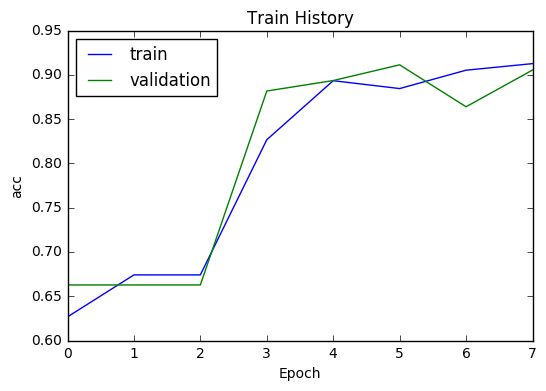

In [53]:
show_train_history(train_history,'acc','val_acc')

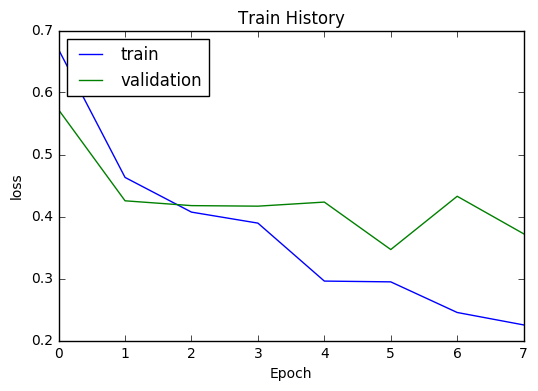

In [54]:
show_train_history(train_history,'loss','val_loss')

In [55]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

211/211 [==============================] - 0s 473us/step


In [56]:
scores[1]

0.8720379132795107